In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14
})

# MOS

Popt values
-----------
64 Hz
[ 2.75148964 -0.41076057]
640 Hz
[ 2.80778275 -0.42670598]
6400 Hz
[ 2.80006523 -0.41457306]
Pcov values
-----------
64 Hz
[0.34498186 0.67109001]
640 Hz
[0.35205789 0.67260115]
6400 Hz
[0.35101281 0.67138323]


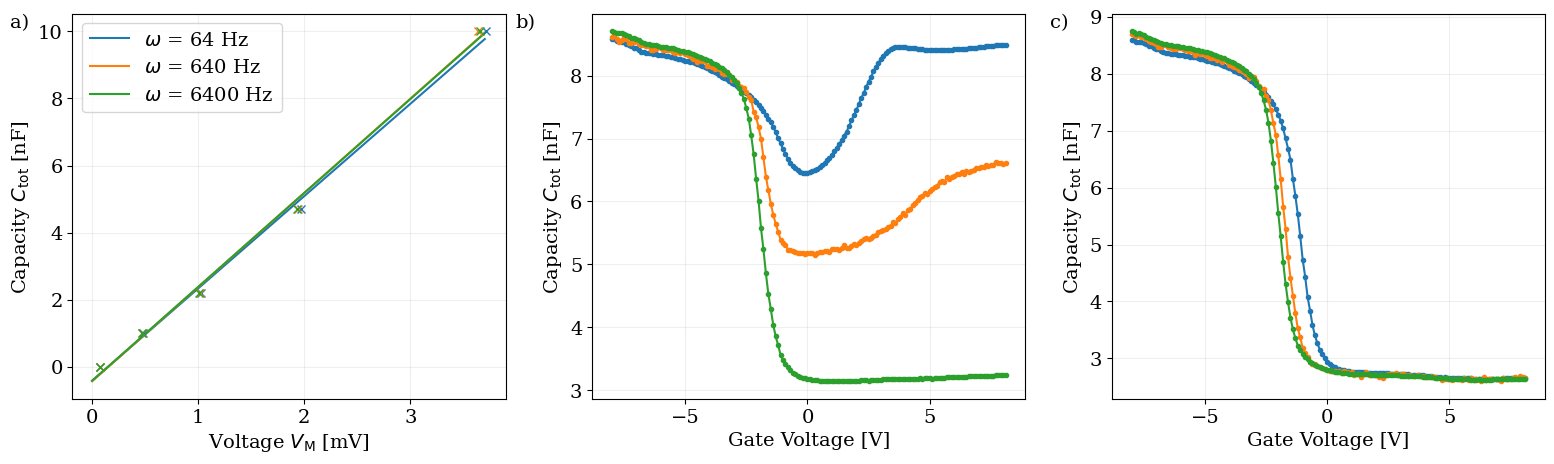

In [3]:
plt.rcParams["figure.figsize"] = (19,5)
cap__nF = [0, 1, 2.2, 4.7, 10]

voltage_64__mV = [0.072, 0.475, 1.028, 1.967, 3.71]
voltage_640__mV = [0.077, 0.469, 1.013, 1.936, 3.64]
voltage_6400__mV = [0.078, 0.466, 1.009, 1.929, 3.651]

def linear_model(x, a, b):
    return a * x + b

voltage = np.linspace(0, 3.7, 20)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.errorbar(voltage_64__mV, cap__nF, yerr=0.003, fmt="x")
ax1.errorbar(voltage_640__mV, cap__nF, yerr=0.003, fmt="x")
ax1.errorbar(voltage_6400__mV, cap__nF, yerr=0.003, fmt="x")

popt_64, pcov_64 = curve_fit(linear_model, voltage_64__mV, cap__nF, absolute_sigma=True)
popt_640, pcov_640 = curve_fit(linear_model, voltage_640__mV, cap__nF, absolute_sigma=True)
popt_6400, pcov_6400 = curve_fit(linear_model, voltage_6400__mV, cap__nF, absolute_sigma=True)

ax1.plot(voltage, linear_model(voltage, *popt_64), label="$\omega$ = 64 Hz", color ="C0")
ax1.plot(voltage, linear_model(voltage, *popt_640), label="$\omega$ = 640 Hz", color="C1")
ax1.plot(voltage, linear_model(voltage, *popt_6400), label="$\omega$ = 6400 Hz", color="C2")

print("Popt values")
print("-----------")
print("64 Hz")
print(popt_64)
print("640 Hz")
print(popt_640)
print("6400 Hz")
print(popt_6400)

print("Pcov values")
print("-----------")
print("64 Hz")
print(np.sqrt(np.diag(pcov_64)))
print("640 Hz")
print(np.sqrt(np.diag(pcov_640)))
print("6400 Hz")
print(np.sqrt(np.diag(pcov_6400)))

ax1.grid(alpha=0.2)

ax1.set_ylabel("Capacity $C_\mathrm{tot}$ [nF]")
ax1.set_xlabel("Voltage $V_\mathrm{M}$ [mV]")
ax1.legend()

dc_64_light, v_light_64 = np.loadtxt("DATA/mos_64_with_light.txt", unpack="True")
dc_640_light, v_light_640 = np.loadtxt("DATA/mos_640_with_light.txt", unpack="True")
dc_6400_light, v_light_6400 = np.loadtxt("DATA/mos_6400_with_light.txt", unpack="True")

dc_64, v_64 = np.loadtxt("DATA/mos_64_wo_light.txt", unpack="True")
dc_640, v_640 = np.loadtxt("DATA/mos_640_wo_light.txt", unpack="True")
dc_6400, v_6400 = np.loadtxt("DATA/mos_6400_wo_light.txt", unpack="True")

ax2.plot(dc_64_light, linear_model(v_light_64, *popt_64), ".-")
ax2.plot(dc_640_light, linear_model(v_light_640, *popt_640), ".-")
ax2.plot(dc_6400_light, linear_model(v_light_6400, *popt_6400), ".-")
ax2.grid(alpha=0.2)
ax2.set_xlabel("Gate Voltage [V]")
ax2.set_ylabel("Capacity $C_\mathrm{tot}$ [nF]")

ax3.plot(dc_64, linear_model(v_64, *popt_64), ".-")
ax3.plot(dc_640, linear_model(v_640, *popt_640), ".-")
ax3.plot(dc_6400, linear_model(v_6400, *popt_6400), ".-")
ax3.grid(alpha=0.2)
ax3.set_xlabel("Gate Voltage [V]")
ax3.set_ylabel("Capacity $C_\mathrm{tot}$ [nF]")

ax1.text(-0.1, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.13, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.1, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')

plt.savefig('MOS.pdf', bbox_inches='tight')  
plt.show()

# MOSFET

/var/folders/6r/58697_t90t94wvdzw0xdvzj00000gn/T/ipykernel_4697/1901636270.py:48: RuntimeWarning: divide by zero encountered in true_divide
  mu_eff_77 = length / width * I_SD_77 / vsd / n_s_77 / e


Scattering times
-----------------
300 K
9.589405213160883e-14
77 K
1.0338327091136081e-14


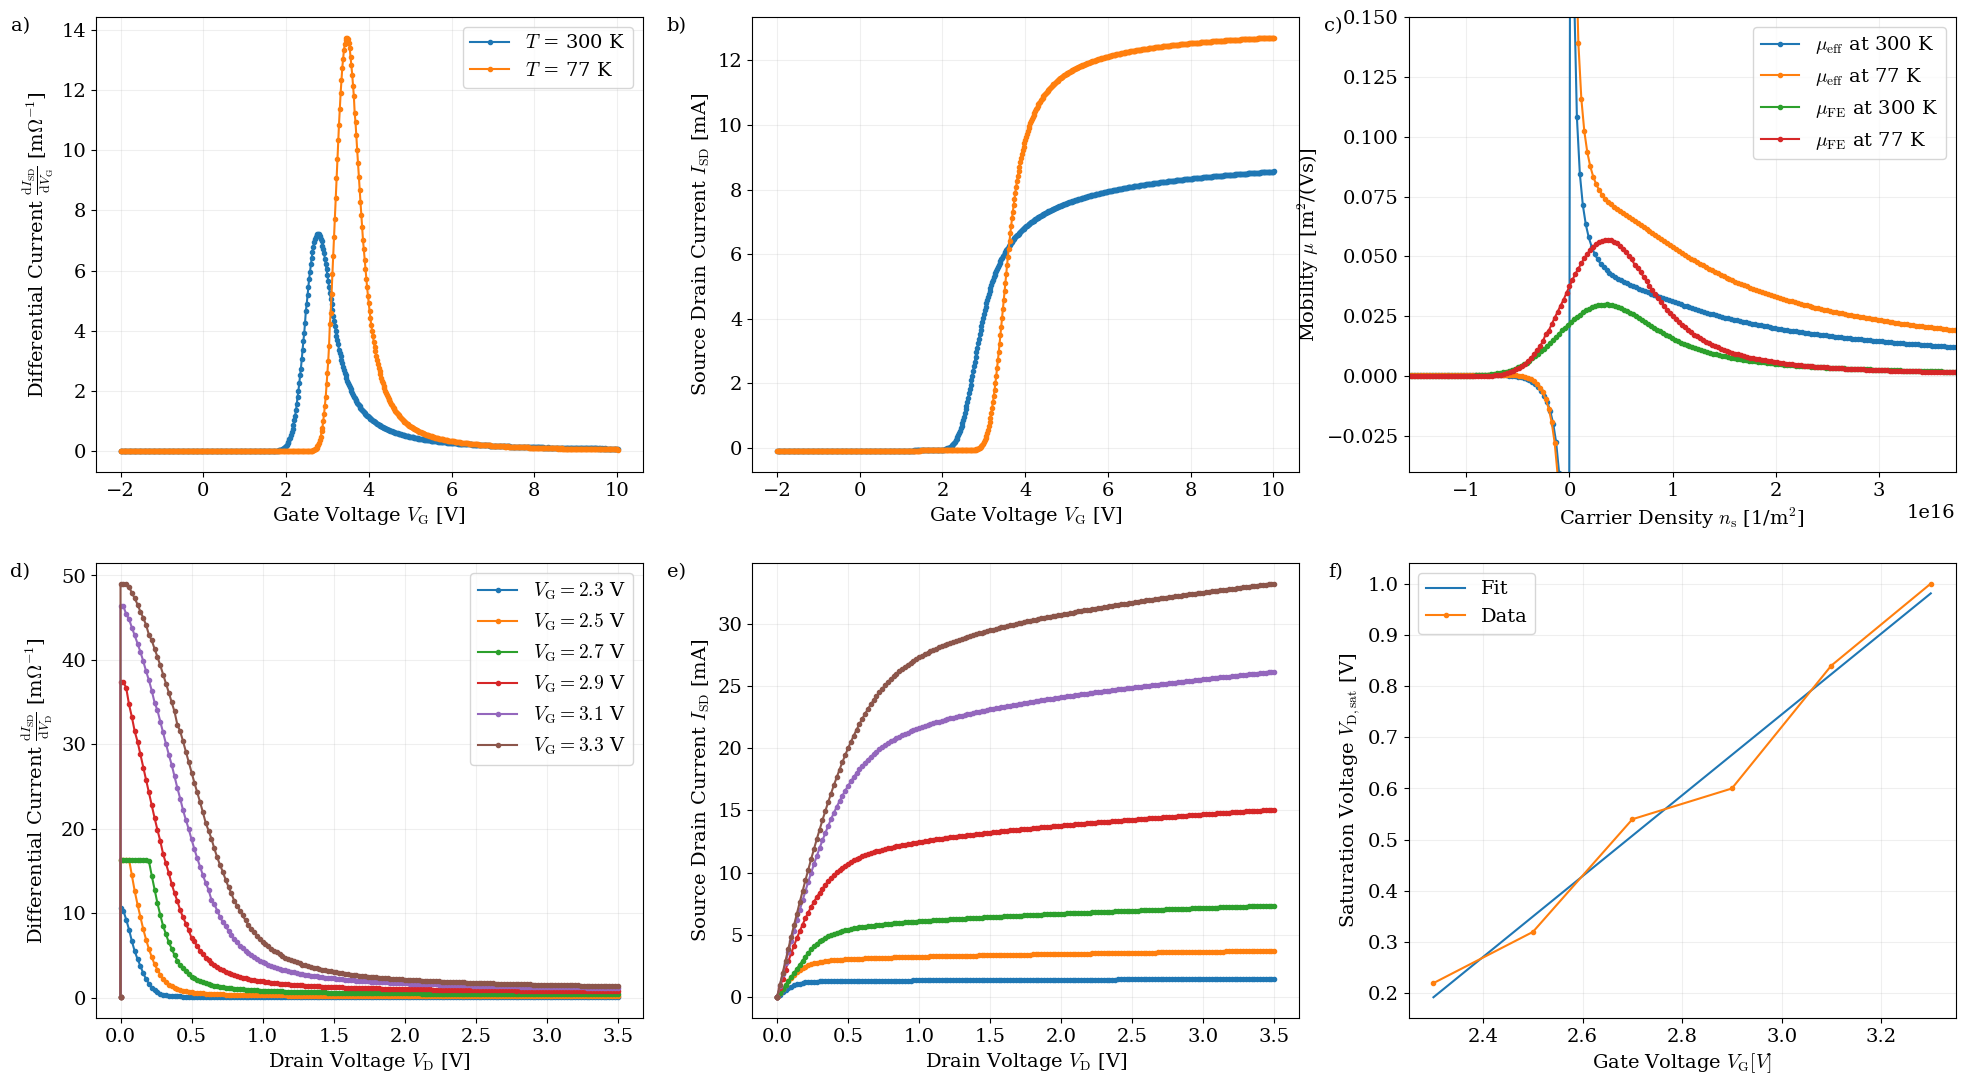

In [12]:
plt.rcParams["figure.figsize"] = (24,13)
plt.rcParams["mathtext.fontset"] = "cm"
 
fig, axes = plt.subplots(nrows=2, ncols=3)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

ax1.text(-0.12, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.12, 1, "c)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')
ax4.text(-0.12, 1, "d)", transform=ax4.transAxes,fontsize=14, va='top', ha='right')
ax5.text(-0.12, 1, "e)", transform=ax5.transAxes,fontsize=14, va='top', ha='right')
ax6.text(-0.12, 1, "f)", transform=ax6.transAxes,fontsize=14, va='top', ha='right')

vg_300K, differential_300K = np.loadtxt("DATA/Vg_MOSFET_RT.txt", unpack="True")
vg_77K, differential_77K = np.loadtxt("DATA/Vg_MOSFET_LN.txt", unpack="True")

ax1.plot(vg_300K[1:], differential_300K[1:], ".-", label="$T$ = 300 K")
ax1.plot(vg_77K[1:], differential_77K[1:], ".-", label="$T$ = 77 K")
ax1.set_ylabel("Differential Current $\\frac{\mathrm{d}I_\mathrm{SD}}{\mathrm{d}V_\mathrm{G}}$ [m$\Omega^{-1}$]")
ax1.set_xlabel("Gate Voltage $V_{\mathrm{G}}$ [V]")
ax1.legend()
ax1.grid(alpha=0.2)

I_SD_300 = integrate.cumtrapz(differential_300K, vg_300K, initial=0)[1:]
I_SD_77 = integrate.cumtrapz(differential_77K, vg_77K, initial=0)[1:]
ax2.plot(vg_300K[1:], I_SD_300, ".-", label="$T$ = 300 K")
ax2.plot(vg_77K[1:], I_SD_77, ".-", label="$T$ = 77 K")

ax2.grid(alpha=0.2)
#ax2.legend()
ax2.set_ylabel("Source Drain Current $I_\mathrm{SD}$ [mA]")
ax2.set_xlabel("Gate Voltage $V_\mathrm{G}$ [V]")

length = 100 * 1e-9
width = 100 * 1e-6
d = 15 * 1e-9
c_ox = 8.854 * 1e-12 * 3.9 * length * width / d
V_T_300 = 2.53
V_T_77 = 3.22
vsd = 104.9
e = 1.602 * 1e-19

n_s_300 = c_ox / length / width * (vg_300K[1:] - V_T_300) / e
mu_eff_300 = length / width * I_SD_300 / vsd / n_s_300 / e
mu_FE_300 = length ** 2 / c_ox / vsd * differential_300K[1:]

n_s_77 = c_ox / length / width * (vg_77K[1:] - V_T_77) / e
mu_eff_77 = length / width * I_SD_77 / vsd / n_s_77 / e
mu_FE_77 = length ** 2 / c_ox / vsd * differential_77K[1:]


ax3.plot(n_s_300, mu_eff_300, ".-", label="$\mu_\mathrm{eff}$ at 300 K")
ax3.plot(n_s_77, mu_eff_77, ".-", label="$\mu_\mathrm{eff}$ at 77 K")
ax3.plot(n_s_300, mu_FE_300, ".-", label="$\mu_\mathrm{FE}$ at 300 K")
ax3.plot(n_s_77, mu_FE_77, ".-", label="$\mu_\mathrm{FE}$ at 77 K")

ax3.legend()
ax3.set_ylabel("Mobility $\mu$ [m$^2$/(Vs)]")
ax3.set_xlabel("Carrier Density $n_\mathrm{s}$ [1/m$^2$]")
ax3.grid(alpha=0.2)
ax3.set_xlim(-0.0025 / e, 0.006 / e)
ax3.set_ylim(-4 * 1e-2, 15*1e-2)

m_star = 0.2 * 9.1 * 1e-31
e = 1.602 * 1e-19

print("Scattering times")
print("-----------------")
print("300 K")
print(max(mu_eff_300[np.argmax(mu_eff_300)+3:]) * m_star / e)
print("77 K")
print(0.0091 * m_star / e)

# vsd_23, differential_23 = np.loadtxt("DATA/mosfet_64_vg_2.3.txt", unpack="True")
# vsd_25, differential_25 = np.loadtxt("DATA/mosfet_64_vg_2.5.txt", unpack="True")
# vsd_27, differential_27 = np.loadtxt("DATA/mosfet_64_vg_2.7.txt", unpack="True")
# vsd_29, differential_29 = np.loadtxt("DATA/mosfet_64_vg_2.9.txt", unpack="True")
# vsd_31, differential_31 = np.loadtxt("DATA/mosfet_64_vg_3.1_30mV_range.txt", unpack="True")
# vsd_33, differential_33 = np.loadtxt("DATA/mosfet_64_vg_3.3_30mV_range.txt", unpack="True")

vsd_23, differential_23 = np.loadtxt("DATA/Vds_MOSFET_23.txt", unpack="True")
vsd_25, differential_25 = np.loadtxt("DATA/Vds_MOSFET_25.txt", unpack="True")
vsd_27, differential_27 = np.loadtxt("DATA/Vds_MOSFET_27.txt", unpack="True")
vsd_29, differential_29 = np.loadtxt("DATA/Vds_MOSFET_29.txt", unpack="True")
vsd_31, differential_31 = np.loadtxt("DATA/Vds_MOSFET_31.txt", unpack="True")
vsd_33, differential_33 = np.loadtxt("DATA/Vds_MOSFET_33.txt", unpack="True")


ax4.plot(vsd_23, differential_23, ".-", label="$V_\mathrm{G}=2.3$ V")
ax4.plot(vsd_25, differential_25, ".-", label="$V_\mathrm{G}=2.5$ V")
ax4.plot(vsd_27, differential_27, ".-", label="$V_\mathrm{G}=2.7$ V")
ax4.plot(vsd_29, differential_29, ".-", label="$V_\mathrm{G}=2.9$ V")
ax4.plot(vsd_31, differential_31, ".-", label="$V_\mathrm{G}=3.1$ V")
ax4.plot(vsd_33, differential_33, ".-", label="$V_\mathrm{G}=3.3$ V")

ax4.grid(alpha=0.2)
ax4.legend()
ax4.set_xlabel("Drain Voltage $V_\mathrm{D}$ [V]")
ax4.set_ylabel("Differential Current $\\frac{\mathrm{d}I_\mathrm{SD}}{\mathrm{d}V_\mathrm{D}}$ [m$\Omega^{-1}$]")


y_int_23 = integrate.cumtrapz(differential_23, vsd_23, initial=0)
y_int_25 = integrate.cumtrapz(differential_25, vsd_25, initial=0)
y_int_27 = integrate.cumtrapz(differential_27, vsd_27, initial=0)
y_int_29 = integrate.cumtrapz(differential_29, vsd_29, initial=0)
y_int_31 = integrate.cumtrapz(differential_31, vsd_31, initial=0)
y_int_33 = integrate.cumtrapz(differential_33, vsd_33, initial=0)

ax5.plot(vsd_23, y_int_23, ".-", label="$V_G=2.3$ V")
ax5.plot(vsd_25, y_int_25, ".-", label="$V_G=2.5$ V")
ax5.plot(vsd_27, y_int_27, ".-", label="$V_G=2.7$ V")
ax5.plot(vsd_29, y_int_29, ".-", label="$V_G=2.9$ V")
ax5.plot(vsd_31, y_int_31, ".-", label="$V_G=3.1$ V")
ax5.plot(vsd_33, y_int_33, ".-", label="$V_G=3.3$ V")

ax5.grid(alpha=0.2)
ax5.set_ylabel("Source Drain Current $I_\mathrm{SD}$ [mA]")
ax5.set_xlabel("Drain Voltage $V_\mathrm{D}$ [V]")

index23 = np.where(differential_23/max(differential_23) < 1/np.e ** 2)[0][1]
index25 = np.where(differential_25/max(differential_25) < 1/np.e ** 2)[0][1]
index27 = np.where(differential_27/max(differential_27) < 1/np.e ** 2)[0][1]
index29 = np.where(differential_29/max(differential_29) < 1/np.e ** 2)[0][1]
index31 = np.where(differential_31/max(differential_31) < 1/np.e ** 2)[0][1]
index33 = np.where(differential_33/max(differential_33) < 1/np.e ** 2)[0][1]

vsat = [vsd_23[index23], vsd_25[index25], vsd_27[index27], vsd_29[index29], vsd_31[index31], vsd_33[index33]]
vg = [2.3, 2.5, 2.7, 2.9, 3.1, 3.3]

def linear(x, a, b):
    return a*x+b

vg_linspace = np.linspace(min(vg), max(vg), 1000)
ax6.plot(vg_linspace, linear(vg_linspace, *curve_fit(linear, vg, vsat)[0]), label="Fit")
ax6.plot(vg, vsat, ".-", label="Data")
ax6.set_ylabel("Saturation Voltage $V_\mathrm{D,sat}$ [V]")
ax6.set_xlabel("Gate Voltage $V_\mathrm{G} [V]$")
ax6.grid(alpha=0.2)
ax6.legend()

#ax6.plot(vg_linspace, linear_model(vg_linspace, 1, -2.52))
#ax6.set_ylim(0)

# To determine the threshold voltage
x_linspace = np.linspace(2.8, 3.6, 100)
# print(np.where(integrate.cumtrapz(differential_77K, vg_77K, initial=0) >= 0.6))
# print(np.where(integrate.cumtrapz(differential_77K, vg_77K, initial=0) <= 0.1))
# ax2.plot(x_linspace, linear_model(x_linspace, *curve_fit(linear_model, vg_77K[264:278], integrate.cumtrapz(differential_77K, vg_77K, initial=0)[264:278])[0]))
# ax2.plot(x_linspace, linear_model(x_linspace, *curve_fit(linear_model, vg_77K[264:278], integrate.cumtrapz(differential_77K, vg_77K, initial=0)[264:278])[0]))

# popt = curve_fit(linear_model, vg_77K[264:278], integrate.cumtrapz(differential_77K, vg_77K, initial=0)[264:278])[0]
# print(-popt[1]/popt[0])
plt.savefig('MOSFET.pdf', bbox_inches='tight')  

(-1.0, 35.97441370415376)

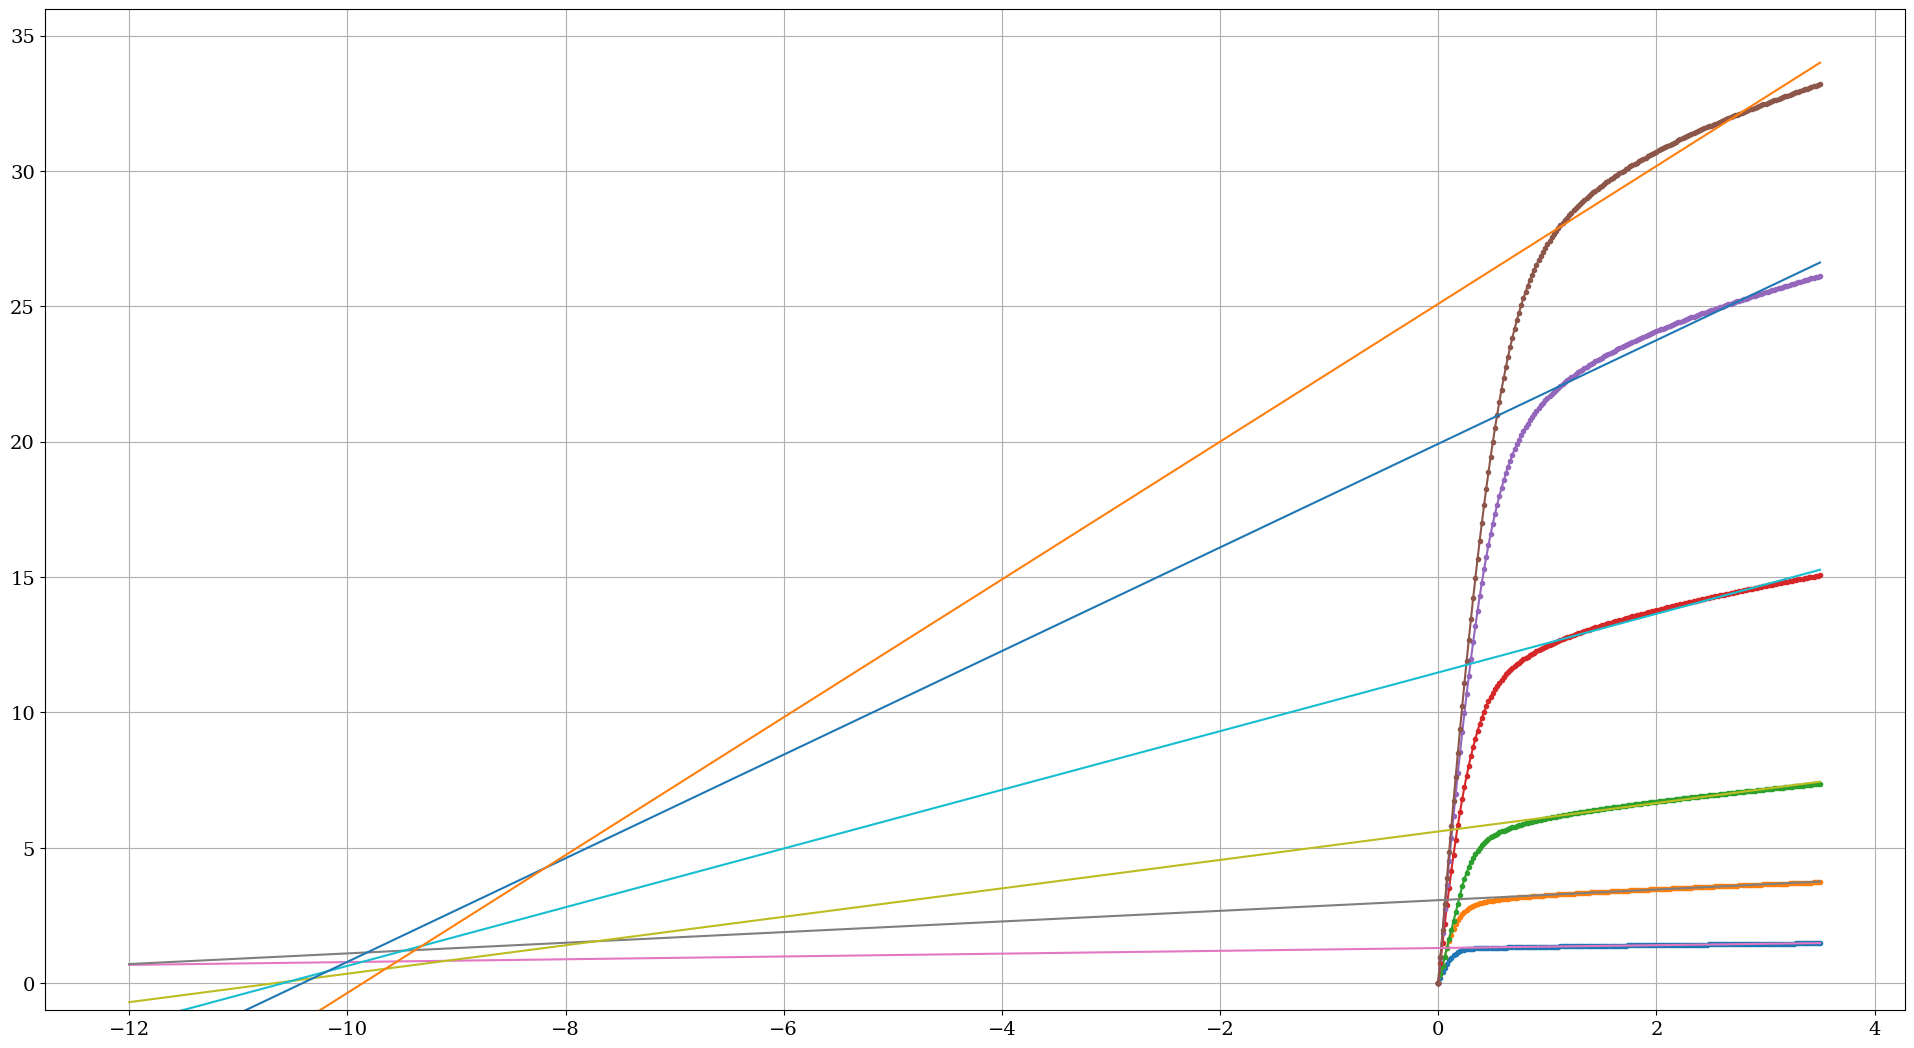

In [5]:
plt.plot(vsd_23, y_int_23, ".-", label="$V_G=2.3$ V")
plt.plot(vsd_25, y_int_25, ".-", label="$V_G=2.5$ V")
plt.plot(vsd_27, y_int_27, ".-", label="$V_G=2.7$ V")
plt.plot(vsd_29, y_int_29, ".-", label="$V_G=2.9$ V")
plt.plot(vsd_31, y_int_31, ".-", label="$V_G=3.1$ V")
plt.plot(vsd_33, y_int_33, ".-", label="$V_G=3.3$ V")

y_list = [y_int_23, y_int_25, y_int_27, y_int_29, y_int_31, y_int_33]
x_list = [vsd_23, vsd_25, vsd_27, vsd_29, vsd_31, vsd_33]

x = np.linspace(-12, 3.5, 100)

for i in range(len(y_list)):
    popt, pcov = curve_fit(linear_model, x_list[i][-140:-1], y_list[i][-140:-1])
    plt.plot(x, linear_model(x, *popt))

plt.grid()
plt.ylim(-1)

In [ ]:
ax4.plot(vsd_23, differential_23, ".-", label="$V_\mathrm{G}=2.3$ V")
ax4.plot(vsd_25, differential_25, ".-", label="$V_\mathrm{G}=2.5$ V")
ax4.plot(vsd_27, differential_27, ".-", label="$V_\mathrm{G}=2.7$ V")
ax4.plot(vsd_29, differential_29, ".-", label="$V_\mathrm{G}=2.9$ V")
ax4.plot(vsd_31, differential_31, ".-", label="$V_\mathrm{G}=3.1$ V")
ax4.plot(vsd_33, differential_33, ".-", label="$V_\mathrm{G}=3.3$ V")

y_list = [y_int_23, y_int_25, y_int_27, y_int_29, y_int_31, y_int_33]
x_list = [vsd_23, vsd_25, vsd_27, vsd_29, vsd_31, vsd_33]

x = np.linspace(-12, 3.5, 100)

for i in range(len(y_list)):
    popt, pcov = curve_fit(linear_model, x_list[i][-140:-1], y_list[i][-140:-1])
    plt.plot(x, linear_model(x, *popt))

plt.grid()
plt.ylim(-1)

In [3]:
import pymc3 as pm

# Define the distribution function
def distribution_function(x):
    # Replace this with your own distribution function
    return x**2

# Set the number of samples to take
num_samples = 1000

# Set the step size for the Metropolis-Hastings algorithm
step_size = 0.1

# Create a PyMC3 model
with pm.Model() as model:
    # Define the variable to sample
    x = pm.Uniform('x', lower=0, upper=1)

    # Define the likelihood function
    likelihood = pm.DensityDist('likelihood', lambda value: distribution_function(value), observed={'x': x})

    # Use the Metropolis-Hastings algorithm to sample from the distribution
    trace = pm.sample(num_samples, step=pm.Metropolis(), start={'x': 0.5}, tune=500)

# Extract the samples from the trace
samples = trace['x']

# Plot the resulting samples using matplotlib
import matplotlib.pyplot as plt
plt.hist(samples, bins=50)
plt.show()


TypeError: <lambda>() got an unexpected keyword argument 'x'

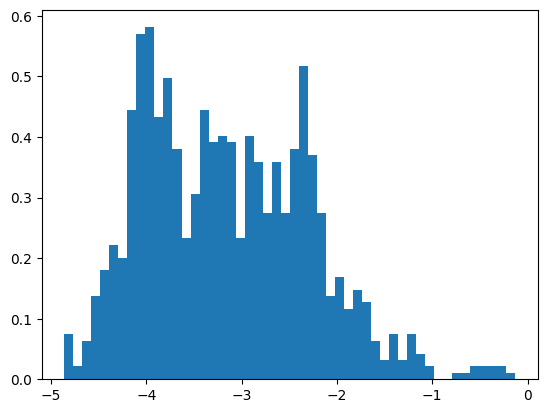

In [16]:
import random

# Define the distribution function
def distribution_function(x):
    # Replace this with your own distribution function
    return x**2

# Set the number of samples to take
num_samples = 1000

# Set the initial x value and the distribution function value at that point
x = 0
y = distribution_function(x)

# Set the step size for the Metropolis-Hastings algorithm
step_size = 0.1

# Initialize a list to store the samples
samples = []

# Iterate for the desired number of samples
for i in range(num_samples):
    # Generate a proposal x value by sampling from a normal distribution centered at the current x value
    x_prime = random.gauss(x, step_size)

    # Calculate the distribution function value at the proposed x value
    y_prime = distribution_function(x_prime)

    # Calculate the acceptance probability
    acceptance_probability = y_prime / y if y > 0 else 1

    # Generate a random number between 0 and 1 to decide whether to accept the proposal
    u = random.random()

    # If the random number is less than the acceptance probability, accept the proposal and update the current x value
    if u < acceptance_probability:
        x = x_prime
        y = y_prime

    # Append the current x value to the list of samples
    samples.append(x)

# Plot the resulting samples using matplotlib
import matplotlib.pyplot as plt
plt.hist(samples, bins=50, density=True)
plt.show()


100000


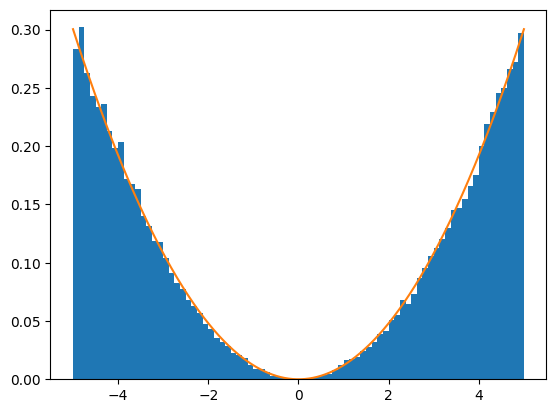

In [15]:
def normal(x,mu,sigma):
    return x**2
    #numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    #denominator = sigma * np.sqrt(2*np.pi)
    #return numerator/denominator

def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    
def gaussian_mcmc(hops,mu,sigma):
    states = []
    burn_in = int(hops*0.2)
    current = random.uniform(-5*sigma+mu,5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = random.uniform(-5*sigma+mu,5*sigma+mu)
        
        curr_prob = normal(x=current,mu=mu,sigma=sigma)
        move_prob = normal(x=movement,mu=mu,sigma=sigma)
        
        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement
    return states
    
lines = np.linspace(-5,5,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]
dist = gaussian_mcmc(100_000,mu=0,sigma=1)
print(len(dist))
plt.hist(dist,bins=80, density=True) 
plt.plot(lines,np.array(normal_curve)/(0.666*125))